## Project 2: Personal Loan Campaign Modelling

Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

### Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the datasets and libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt       
%matplotlib inline 
import seaborn as sns
from uszipcode import SearchEngine, SimpleZipcode, Zipcode
from sklearn.model_selection import train_test_split
loan = pd.read_csv("Bank_Personal_Loan_Modelling.csv") 
loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
#check datatypes
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
#statistical summary
loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Notes: 
The minimum value for experience is -3, which is hardly possible. I will replace those with 0. <br>

In [5]:
len(loan[(loan['Experience']<0)])  #there are 52 negative values for years of experience.

52

In [6]:
loan['Experience'][loan['Experience'] < 0] = 0 #Assuming that those were customers with no experience and replacing negative values with 0 

In [7]:
# of unique values in each column:
loan.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [8]:
#shape
loan.shape

(5000, 14)

In [9]:
#null values 
loan.isnull().values.any()

False

In [10]:
loan.isnull().sum() #no missing values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

In [11]:
# Number of unique in each column
loan.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [12]:
# Number of people with zero mortgage:
mortgage = len(loan.loc[loan['Mortgage'] >0])
no_mortgage = len(loan.loc[loan['Mortgage'] == 0])
print("Number of people with zero mortgage: {0} ({1:2.2f}%)".format(no_mortgage, (no_mortgage / (mortgage + no_mortgage)) * 100))

Number of people with zero mortgage: 3462 (69.24%)


In [13]:
#Number of people with zero credit card spending per month:
cc = len(loan.loc[loan['CCAvg'] >0])
no_cc = len(loan.loc[loan['CCAvg'] == 0])
print("Number of people with zero credit card spending: {0} ({1:2.2f}%)".format(no_cc, (no_cc / (cc + no_cc)) * 100))

Number of people with zero credit card spending: 106 (2.12%)


### Note:
Assuming that it is possible that 2.12% of customers do not spend money on credit cards. Leaving data as is.

#### From Looking at the data, it should be treated as follows: <br>

##### Drop:
ID <br>

##### Continuous:
Age<br>
Experience<br>
Income<br>
CCAvg<br>
Mortgage<br>

##### Categorical:
ZIP Code<br>
Family - (since there are only numbers from 1-4 looks like ordinal category)<br>
Education<br>
Personal Loan<br>
Securities Account<br>
CD Account<br>
Online<br>
Credit card<br>

### Note:
Dealing with Zip Codes. First trying to aggregate Zip Codes by county, then by first 2 numbers of the ZIP Code.

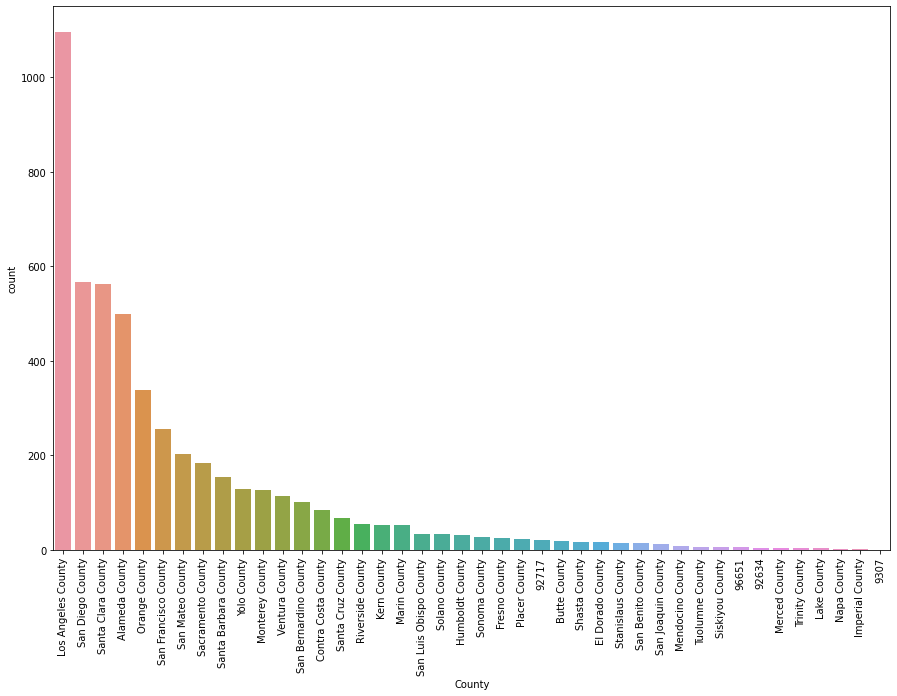

In [14]:
def county(x):
    search = SearchEngine()
    zipcode = search.by_zipcode(x)
    return zipcode.county if zipcode else x 
loan['County'] = loan['ZIP Code'].apply(county)
plt.figure(figsize = (15,10))
plt.xticks(rotation = 90)
sns.countplot(x = 'County',
              data = loan,
              order = loan['County'].value_counts().index)
plt.show()
print()

### Note:
There are quite a few counties with most zip codes belonging to Los Angeles, San Diego, Santa Clara and Alameda counties. This is concerning because the data appears to be skewed. I will try grouping Zip Codes by first 2 numbers instead.

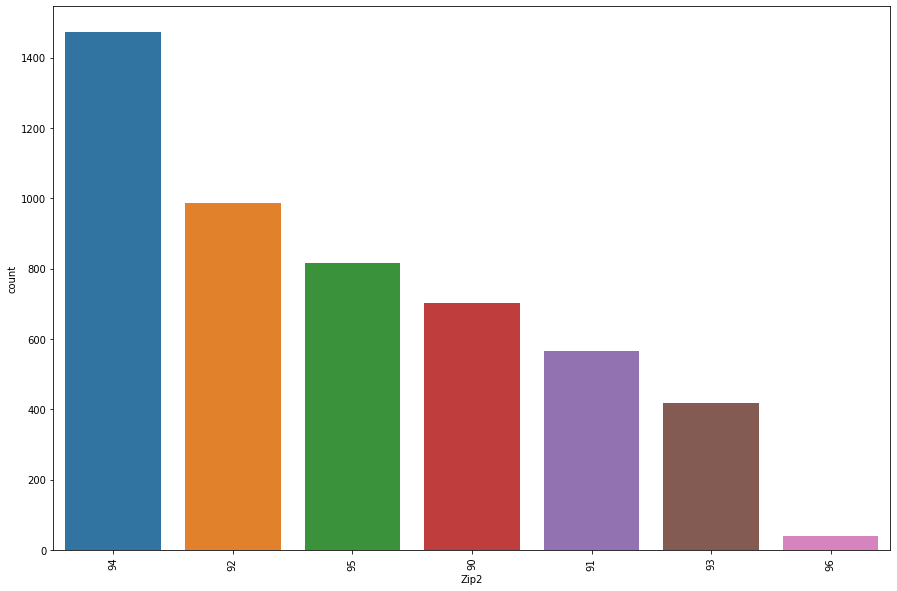

In [15]:
loan['Zip2'] = loan['ZIP Code'].astype(str).str[:2]
plt.figure(figsize = (15,10))
plt.xticks(rotation = 90)
sns.countplot(x = 'Zip2',
              data = loan,
              order = loan['Zip2'].value_counts().index)
plt.show()
print()

### Note:
The data still is skewed with most zipcodes beginning with '94'. However, overall the data looks much better with fewer and larger categories presnt. I will keep this for my Zip Code variables and delete Countties and Zip code columns going forward. 

In [16]:
loan_new = loan.drop(['ID', 'ZIP Code', 'County'], axis=1)
loan_new.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Zip2
0,25,1,49,4,1.6,1,0,0,1,0,0,0,91
1,45,19,34,3,1.5,1,0,0,1,0,0,0,90
2,39,15,11,1,1.0,1,0,0,0,0,0,0,94
3,35,9,100,1,2.7,2,0,0,0,0,0,0,94
4,35,8,45,4,1.0,2,0,0,0,0,0,1,91


In [17]:
#Convert 'Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'CreditCard', 'Zip2' 
#variable to a categorical variable
for i in ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'CreditCard', 'Zip2', 'Online']:
    loan_new[i] = loan_new[i].astype('category')
loan_new.dtypes

Age                      int64
Experience               int64
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
Zip2                  category
dtype: object

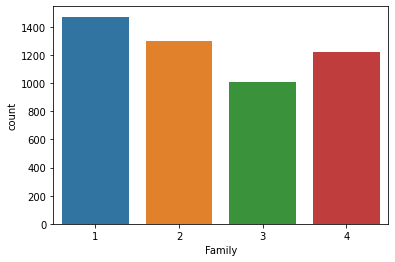

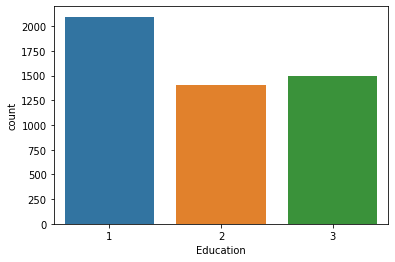

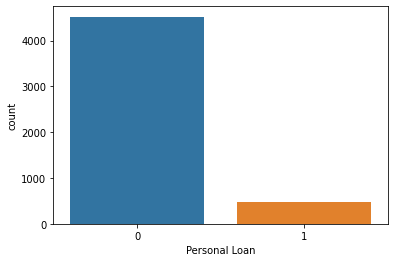

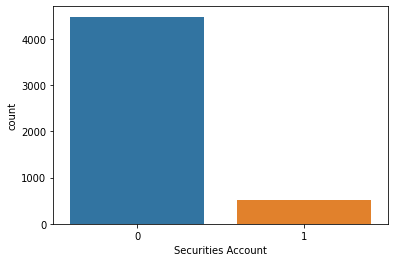

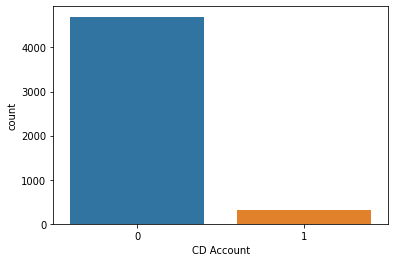

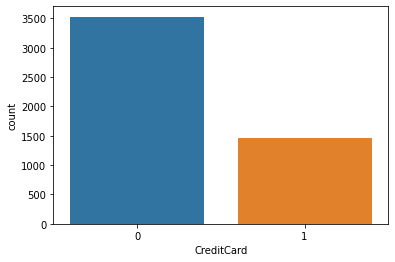

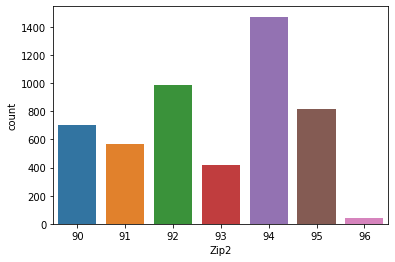

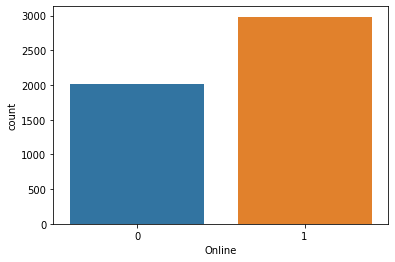

In [18]:
#univriate
for i in ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'CreditCard', 'Zip2', 'Online']:
    sns.countplot(loan_new[i])
    plt.show()

In [19]:
#Value counts of all categorical columns.
for i in list(loan_new.columns[loan_new.dtypes=='category']):   
    print(loan_new[i].value_counts(normalize=True))
    print()

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

1    0.5968
0    0.4032
Name: Online, dtype: float64

0    0.706
1    0.294
Name: CreditCard, dtype: float64

94    0.2944
92    0.1976
95    0.1630
90    0.1406
91    0.1130
93    0.0834
96    0.0080
Name: Zip2, dtype: float64



In [20]:
prop_Y = loan_new['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


### Note:
There is imbalance in data with a lot more people who have not taken a personal loan vs. those who did.

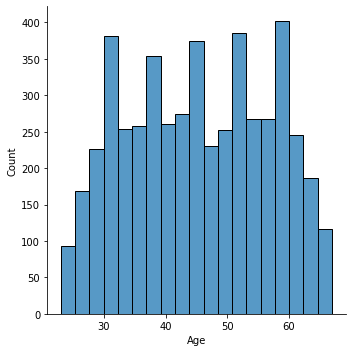

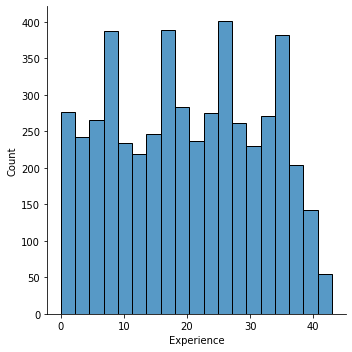

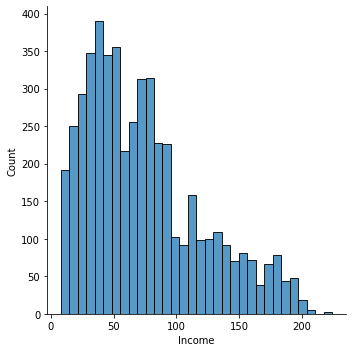

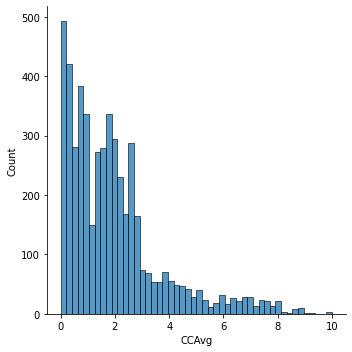

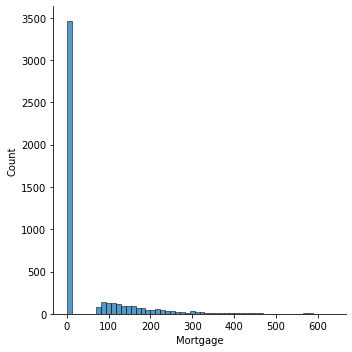

In [21]:
for i  in ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']:
        sns.displot(loan_new[i])
        plt.show

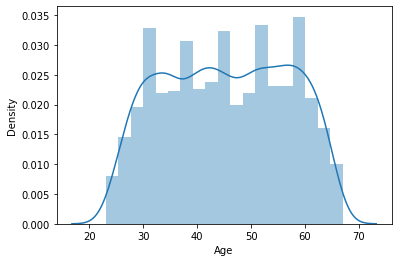

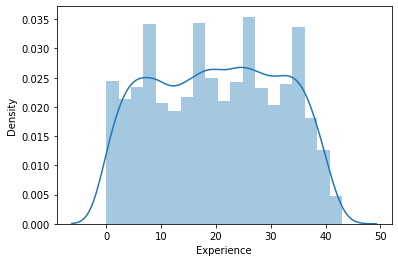

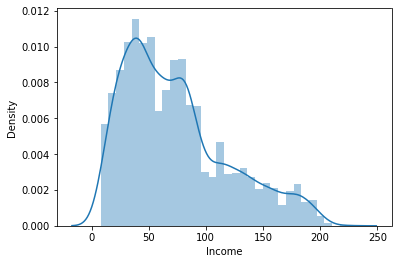

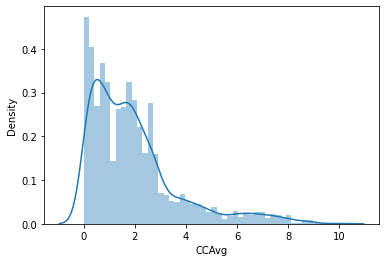

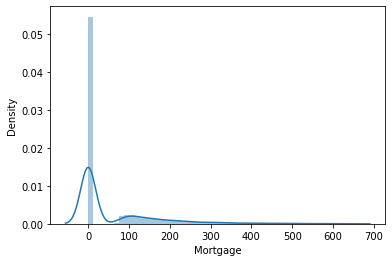

In [22]:
for i in ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']:
    sns.distplot(loan_new[i])
    plt.show()

### Note:
Age and Experience seem to be follow almost the same distribution. One of these variables might have to be dropped. I will check using coefficients how this influences final model. <br>
Mortgage has high numbers og '0' (70%). I will leave this as is and assume that the data is correct. 

In [23]:
#Bivariate
loan_new.groupby(['Personal Loan']).mean()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.367257,20.148894,66.237389,1.729009,51.789381
1,45.066667,19.843750,144.745833,3.905354,100.845833


In [24]:
loan_new.groupby(['Personal Loan']).median()


,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.0,20.0,59.0,1.4,0.0
1,45.0,20.0,142.5,3.8,0.0


### Note:
No major difference for Age and Experience. However, customers who end up taking a loan have more than twice as much income, Credit Card Average and Mortgage.

In [25]:
for i in ['Family', 'Education', 'Securities Account', 'CD Account', 'CreditCard', 'Zip2', 'Online']:  
    print(pd.crosstab(loan_new[i],loan_new['Personal Loan'],normalize='columns'))
    print (' ')

Personal Loan         0         1
Family                           
1              0.301991  0.222917
2              0.263274  0.220833
3              0.194027  0.277083
4              0.240708  0.279167
 
Personal Loan         0         1
Education                        
1              0.443142  0.193750
2              0.270133  0.379167
3              0.286726  0.427083
 
Personal Loan              0      1
Securities Account                 
0                   0.897788  0.875
1                   0.102212  0.125
 
Personal Loan         0         1
CD Account                       
0              0.964159  0.708333
1              0.035841  0.291667
 
Personal Loan         0         1
CreditCard                       
0              0.706416  0.702083
1              0.293584  0.297917
 
Personal Loan         0         1
Zip2                             
90             0.140708  0.139583
91             0.112832  0.114583
92             0.197788  0.195833
93             0.082743  0.089

### Note:
People with professional degrees take out more personal loans.

In [26]:
#Get data model ready
loan_new.corr() 

,Age,Experience,Income,CCAvg,Mortgage
Age,1.000000,0.994198,-0.055269,-0.052012,-0.012539
Experience,0.994198,1.000000,-0.046729,-0.049912,-0.010840
Income,-0.055269,-0.046729,1.000000,0.645984,0.206806
CCAvg,-0.052012,-0.049912,0.645984,1.000000,0.109905
Mortgage,-0.012539,-0.010840,0.206806,0.109905,1.000000


In [27]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

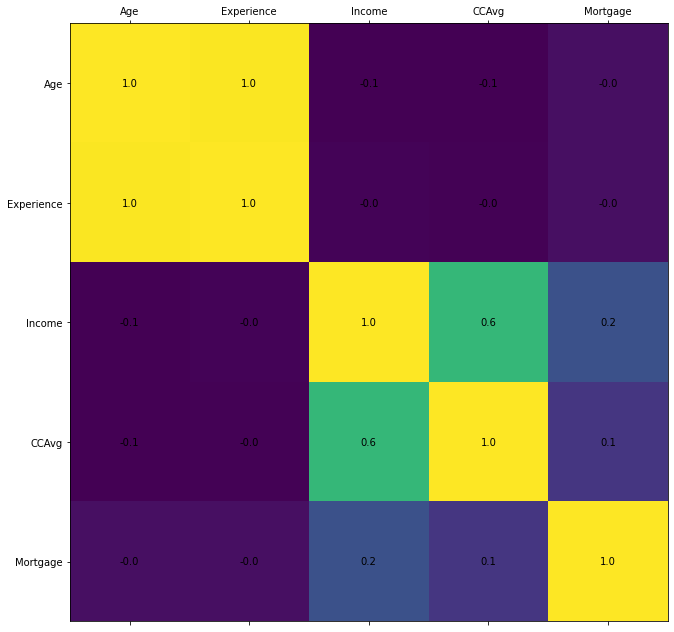

In [28]:
plot_corr(loan_new)

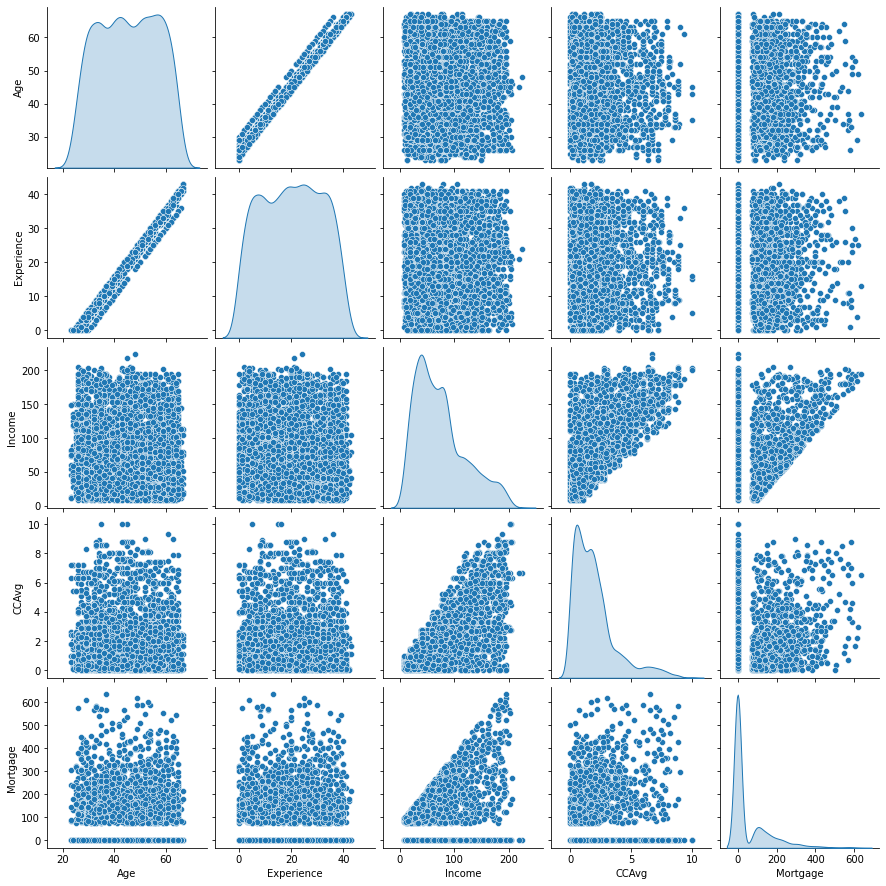

In [29]:
sns.pairplot(loan_new,diag_kind='kde')

### Note:
Age and experience appear to be highly correlated. Might need to drop one variable.<br>
Income and CCAvg show moderate correlation.<br>
Also there appears to be some correlation between mortgage.

### Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [30]:
X = loan_new.drop('Personal Loan', axis=1)
Y = loan_new['Personal Loan']

In [31]:
loan_new.dtypes

Age                      int64
Experience               int64
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
Zip2                  category
dtype: object

In [32]:
Y.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [33]:
X = pd.get_dummies(X, drop_first=True)

In [34]:
##Split into training and test set (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

### Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [35]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=4294967295,fit_intercept=False)
logreg.fit(X_train, y_train)     

LogisticRegression(fit_intercept=False, random_state=4294967295)

In [36]:
y_predict = logreg.predict(X_test)  

In [37]:
z = X_test.copy()
z['Observed Personal Loan'] = y_test
z['Predicted Personal Loan'] = y_predict
z.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,...,Online_1,CreditCard_1,Zip2_91,Zip2_92,Zip2_93,Zip2_94,Zip2_95,Zip2_96,Observed Personal Loan,Predicted Personal Loan
3406,42,12,34,2.0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
757,52,28,81,1.8,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3624,58,28,70,1.4,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4544,28,4,80,2.5,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3235,60,35,39,1.6,0,1,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0


In [38]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9577142857142857

Testing accuracy 0.964

Confusion Matrix


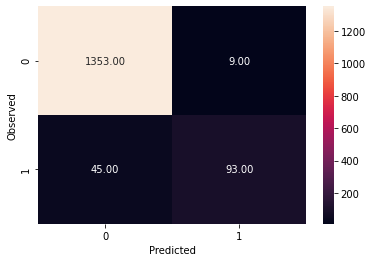

None

Recall: 0.6739130434782609

Precision: 0.9117647058823529

F1 Score: 0.775

Roc Auc Score: 0.833652556981421


In [39]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

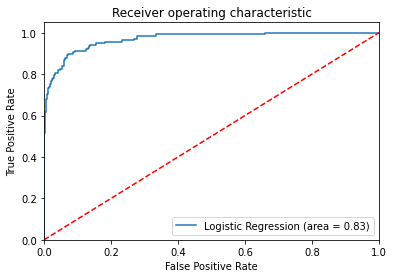

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)


In [41]:
#Coefficients
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
9,Education_3,3.31
8,Education_2,3.16
11,CD Account_1,2.21
6,Family_3,1.76
7,Family_4,1.38
13,CreditCard_1,0.77
12,Online_1,0.57
5,Family_2,0.46
1,Experience,0.44
0,Age,0.43


In [42]:
#all rows where predicted class is not equal to the observed class
error = z.loc[z['Predicted Personal Loan'] != z['Observed Personal Loan']]
error
#There are 54 rows where predicted class differs from the observed class

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,...,Online_1,CreditCard_1,Zip2_91,Zip2_92,Zip2_93,Zip2_94,Zip2_95,Zip2_96,Observed Personal Loan,Predicted Personal Loan
4301,49,24,130,1.10,281,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
4575,53,27,115,0.50,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
78,54,30,133,2.60,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3383,46,22,135,4.10,213,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
459,35,10,200,3.00,458,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1731,43,19,125,2.40,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1901,43,19,201,6.67,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4154,51,25,163,1.30,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
2996,42,18,103,3.33,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,1,0
3983,39,13,93,3.60,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0


### Give conclusion related to the Business understanding of your model? (5 marks)

##### `Confusion matrix`

*True Positive (observed=1,predicted=1):*

Predicted that the customer will take a personal loan and the customer did take a personal loan 93 (6.2%)

*False Positive (observed=0,predicted=1):*

Predicted that the customer will take a personal loan and the customer did not take the loan 9 (0.6%)

*True Negative (observed=0,predicted=0):*

Predicted that that the customer will not take a personal loan and the customer did not take the loan 1353 (90.2%)

*False Negative (observed=1,predicted=0):*

Predicted that the customer will not take a personal loan and the customer did take the loan 45 (3%)

##### `Important Features`
The top 5 important features based on coefficients are:
Education_3, Education_2, CD Account_1, Family_3, Family_4	

##### `Important Metric`

Thera bank wants to increase the success ratio with a minimal budget. In other words, the bank wants to advertise personal loans to those customers who are most likely to buy them while not spending a lot of money on marketing campaigns.  Two metrics are important here: Recall and Precision. <br>
Minimizing false negatives (Recall) is important to not miss out on potential customers who would otherwise convert. In this model Recall is 67.4%. <br>
Thera Bank also wants to spend minimal budget on targeting just the right customers who would buy the loan. Precision, or correct predictions out of total positive predictions, is important. This involves minimizing false positives or those customers who we thought would buy the loan but they don't. Precision of this model is 91.2%.<br>
It would be a business decision to make which business objective to focus on: not missing out on petential customers or saving money and targeting the right customers. This would affect the balance between optimization of Recall and Precision.